# Bootstraping

In [90]:
#install relevant packages
#install.packages("ISLR2")
#install.packages("boot")
library(ISLR2)
#set.seed(1)
library(boot)


In [60]:
# select the data

data <- as.data.frame(read.table('../../data/penn_jae.dat', header = T))
data[,c(3)] <- log(data[,c(3)])

data

abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,⋯,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
10824,0,2.890372,18,0,0,0,0,2,0,⋯,1,0,0,0,0,0,0,0,1,0
10635,2,1.945910,3,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,1,0,0
10551,5,2.890372,6,1,0,0,0,0,0,⋯,0,0,1,0,1,0,0,0,0,0
10824,0,0.000000,1,0,0,0,0,0,0,⋯,1,0,0,0,0,0,0,1,0,0
10747,0,3.295837,27,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
10544,6,1.945910,7,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
10845,1,0.000000,1,0,0,0,0,0,0,⋯,1,0,0,1,0,0,0,1,0,0
10670,3,1.098612,3,1,0,0,0,2,0,⋯,0,0,0,1,0,0,0,0,0,1
10768,3,3.332205,11,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1


In [73]:
#subsets for TG==4

sub_penn= subset(data, tg==4 | tg==0)
sub_penn

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,⋯,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,10824,0,2.890372,18,0,0,0,0,2,0,⋯,1,0,0,0,0,0,0,0,1,0
4,10824,0,0.000000,1,0,0,0,0,0,0,⋯,1,0,0,0,0,0,0,1,0,0
5,10747,0,3.295837,27,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
12,10607,4,2.197225,9,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,1
13,10831,0,3.295837,27,0,0,0,0,1,0,⋯,1,0,0,0,1,1,0,1,0,0
14,10845,0,3.295837,27,1,0,0,0,0,0,⋯,1,0,0,0,1,0,0,1,0,0
15,10831,0,2.197225,9,1,0,0,0,1,0,⋯,1,0,0,0,1,0,0,1,0,0
17,10859,0,3.295837,27,1,0,0,0,1,0,⋯,0,1,0,0,0,0,0,1,0,0
23,10516,0,2.708050,15,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0


## Bootstraping regression

In [70]:
#function for a bootstraping regression

boot.fn <- function(data, index)
  coef(lm(inuidur1 ~ tg+ female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd, data = sub_penn, subset = index))

In [71]:
#call an OLS regression

lm(inuidur1 ~ tg+ female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd, data = sub_penn)



Call:
lm(formula = inuidur1 ~ tg + female + black + othrace + factor(dep) + 
    q2 + q3 + q4 + q5 + q6 + agelt35 + agegt54 + durable + lusd + 
    husd, data = sub_penn)

Coefficients:
 (Intercept)            tg        female         black       othrace  
    2.178462     -0.017923      0.126368     -0.293768     -0.472445  
factor(dep)1  factor(dep)2            q2            q3            q4  
    0.029867      0.096187      0.073678     -0.038507     -0.054949  
          q5            q6       agelt35       agegt54       durable  
   -0.144178      0.003361     -0.162772      0.229667      0.126557  
        lusd          husd  
   -0.175353     -0.105225  


In [74]:
# bootstrap reg using the whole subset
boot.fn(sub_penn, 1:5099 )
#seems to be the same as before

(Intercept)           tg       female        black      othrace factor(dep)1 
 2.178462326 -0.017923121  0.126368328 -0.293767980 -0.472445058  0.029866899 
factor(dep)2           q2           q3           q4           q5           q6 
 0.096186517  0.073678072 -0.038506537 -0.054949195 -0.144177912  0.003361318 
     agelt35      agegt54      durable         lusd         husd 
-0.162772168  0.229666708  0.126557359 -0.175352572 -0.105224727

In [76]:
#bootstrap reg using only 1000 obs
boot.fn(sub_penn, 1:1000 )

#Now, we can see some changes in the estimated coefficients

(Intercept)           tg       female        black      othrace factor(dep)1 
  2.61386543  -0.02066226   0.15901505  -0.33294005  -0.09739112  -0.04169269 
factor(dep)2           q2           q3           q4           q5           q6 
 -0.07965769  -0.38945941  -0.48438772  -0.50277467  -0.57867350  -0.09160939 
     agelt35      agegt54      durable         lusd         husd 
 -0.07502808   0.13708159   0.16087610  -0.05094327  -0.16977565

In [79]:
#using a radom subset of the indeces of the whole dataset
set.seed(2)
boot.fn(sub_penn, sample(5099, 5099, replace = T))

(Intercept)           tg       female        black      othrace factor(dep)1 
  2.16663470  -0.01566477   0.14925169  -0.27268756  -0.24190284   0.08072636 
factor(dep)2           q2           q3           q4           q5           q6 
  0.12131175   0.03777701  -0.03776221  -0.10196491  -0.18106493   0.09147831 
     agelt35      agegt54      durable         lusd         husd 
 -0.17870993   0.22732410   0.15713636  -0.17705499  -0.10470256

In [80]:
## now compute the standard errors of 1000 bootstrap estimates
reg_lineal = boot(sub_penn, boot.fn, 1000)


In [81]:
reg_lineal


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = sub_penn, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
         original        bias    std. error
t1*   2.178462326  2.620993e-03 0.157941485
t2*  -0.017923121 -1.100853e-04 0.008940378
t3*   0.126368328 -8.395288e-04 0.034943753
t4*  -0.293767980 -2.684285e-03 0.059114938
t5*  -0.472445058 -1.144848e-04 0.248725332
t6*   0.029866899  1.159261e-03 0.054522638
t7*   0.096186517 -3.926893e-03 0.045400268
t8*   0.073678072 -5.152941e-04 0.156931390
t9*  -0.038506537 -1.895179e-03 0.156179722
t10* -0.054949195 -6.217477e-04 0.157142479
t11* -0.144177912 -2.123721e-03 0.154589573
t12*  0.003361318  1.512316e-03 0.168265893
t13* -0.162772168 -1.383005e-03 0.037530271
t14*  0.229666708 -3.593901e-03 0.056108327
t15*  0.126557359 -1.597020e-03 0.048345078
t16* -0.175352572  1.688165e-03 0.040924929
t17* -0.105224727  7.161931e-05 0.044539695

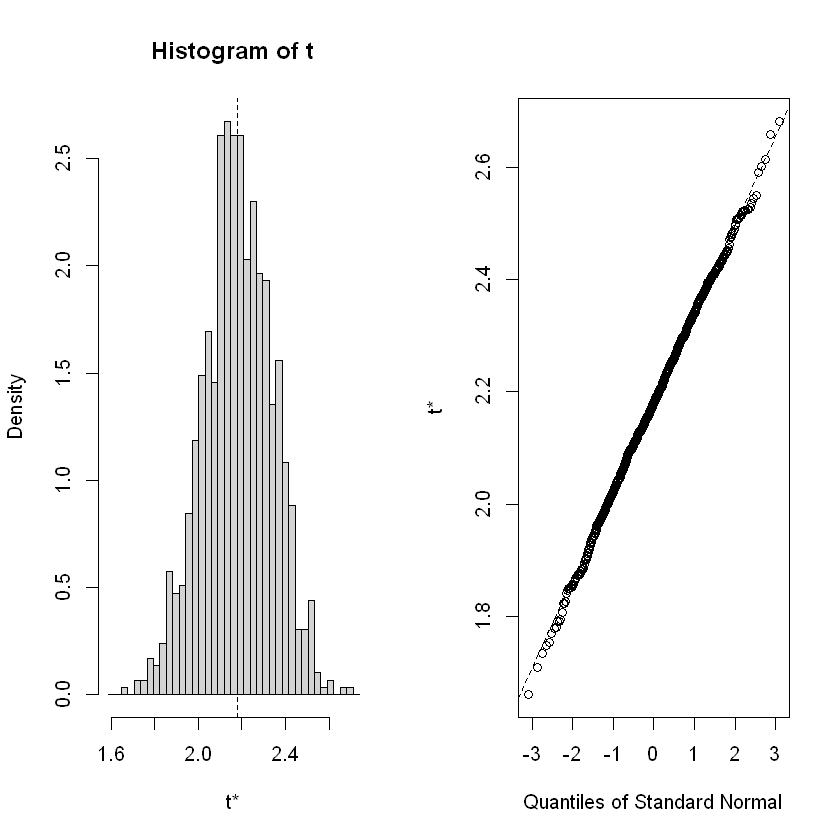

In [82]:
plot(reg_lineal, index=1)  # Histogram distibution of "intercept"


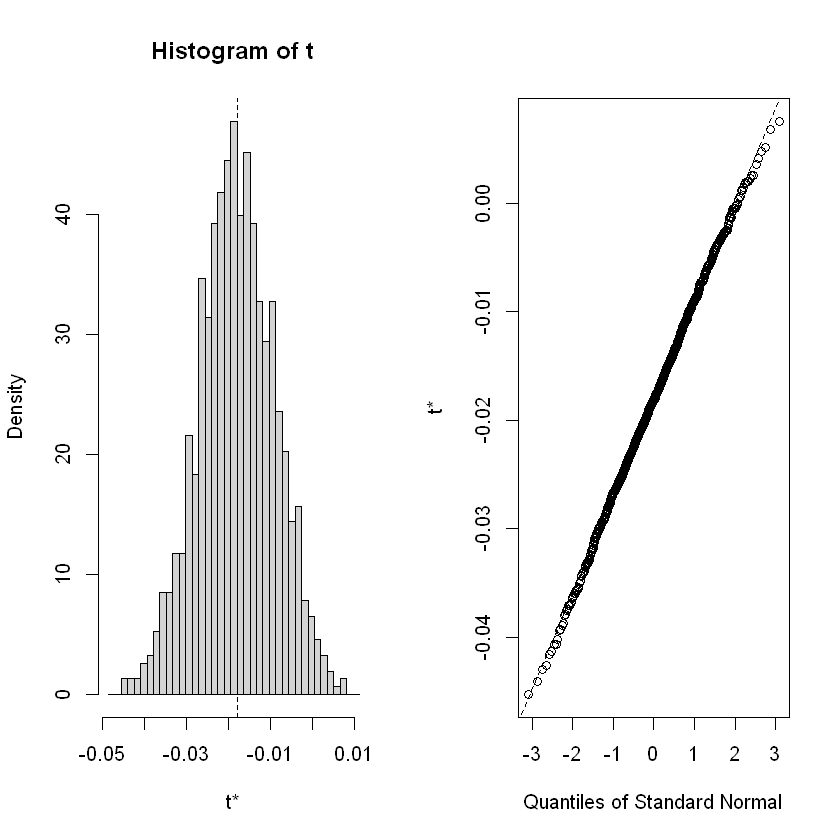

In [83]:
plot(reg_lineal, index=2)  # Histogram of distribution of "treatment"


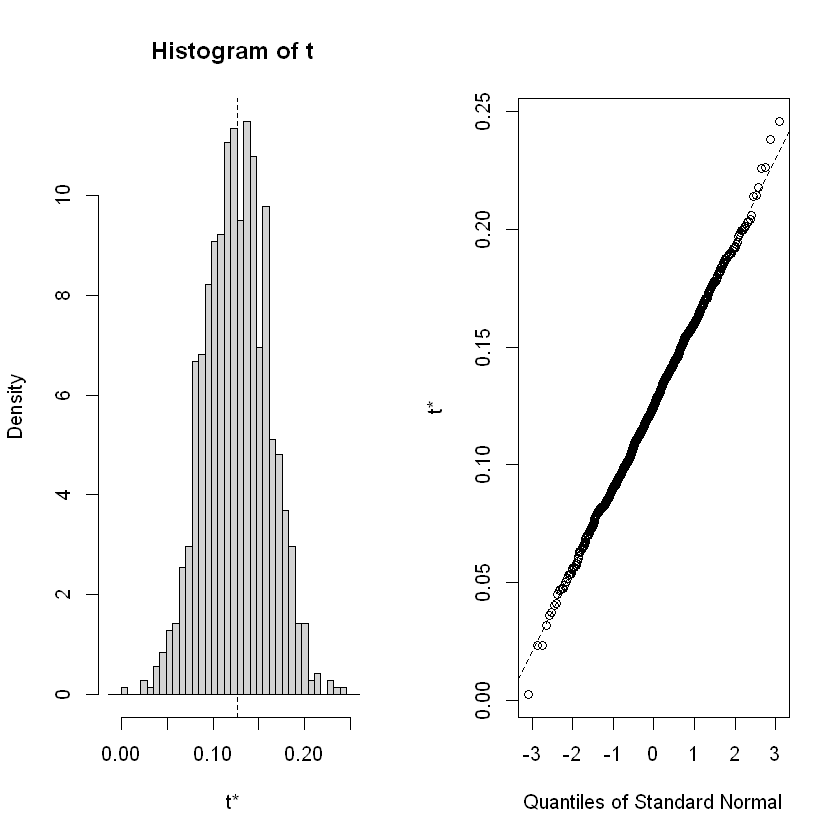

In [95]:
plot(reg_lineal, index=3)  # Histogram of distribution of "female"


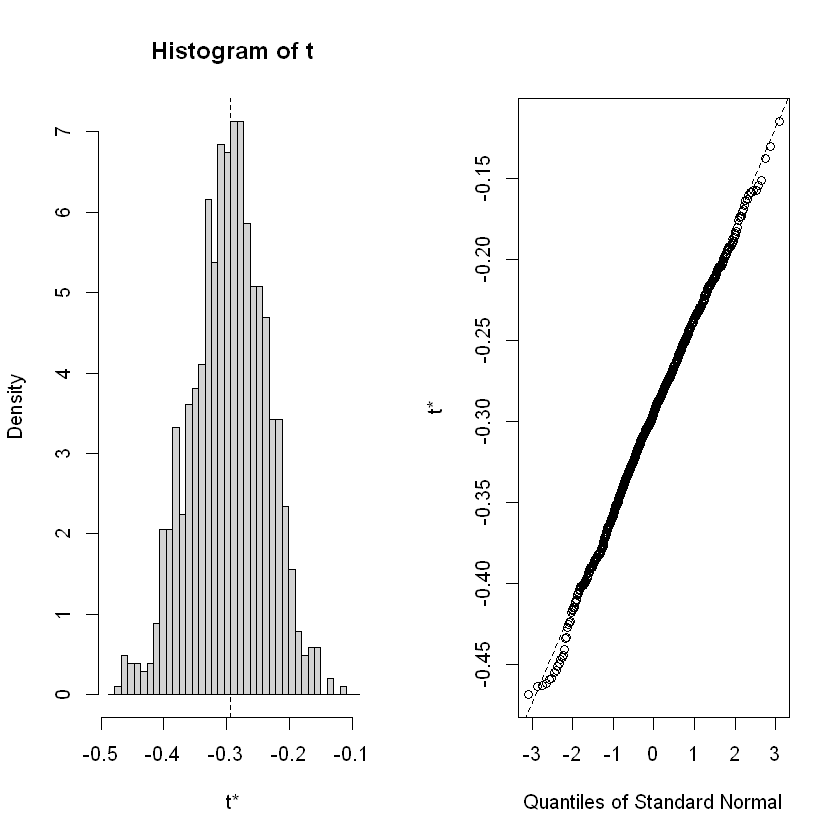

In [96]:
plot(reg_lineal, index=4)  # Histogram of distribution of "black"


This indicates that the bootstrap estimate fot the $SE_{Intercept}$ = 0.158, $SE_{Treatment}$ = 0.009, $SE_{Female}$ = 0.035, $SE_{Black}$ = 0.059

In [94]:
#Comparing the two methods, we have:
reg1 <- lm(inuidur1 ~ tg+ female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd, data = sub_penn)
summary(reg1)
reg_lineal


Call:
lm(formula = inuidur1 ~ tg + female + black + othrace + factor(dep) + 
    q2 + q3 + q4 + q5 + q6 + agelt35 + agegt54 + durable + lusd + 
    husd, data = sub_penn)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6225 -0.9946  0.3130  1.0409  2.0889 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.178462   0.159015  13.700  < 2e-16 ***
tg           -0.017923   0.008866  -2.022 0.043270 *  
female        0.126368   0.034825   3.629 0.000288 ***
black        -0.293768   0.052976  -5.545 3.08e-08 ***
othrace      -0.472445   0.198398  -2.381 0.017288 *  
factor(dep)1  0.029867   0.054140   0.552 0.581207    
factor(dep)2  0.096187   0.046862   2.053 0.040169 *  
q2            0.073678   0.156826   0.470 0.638512    
q3           -0.038507   0.156478  -0.246 0.805628    
q4           -0.054949   0.156560  -0.351 0.725619    
q5           -0.144178   0.155888  -0.925 0.355071    
q6            0.003361   0.166456   0.020 0.983890    
agel


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = sub_penn, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
         original        bias    std. error
t1*   2.178462326  2.620993e-03 0.157941485
t2*  -0.017923121 -1.100853e-04 0.008940378
t3*   0.126368328 -8.395288e-04 0.034943753
t4*  -0.293767980 -2.684285e-03 0.059114938
t5*  -0.472445058 -1.144848e-04 0.248725332
t6*   0.029866899  1.159261e-03 0.054522638
t7*   0.096186517 -3.926893e-03 0.045400268
t8*   0.073678072 -5.152941e-04 0.156931390
t9*  -0.038506537 -1.895179e-03 0.156179722
t10* -0.054949195 -6.217477e-04 0.157142479
t11* -0.144177912 -2.123721e-03 0.154589573
t12*  0.003361318  1.512316e-03 0.168265893
t13* -0.162772168 -1.383005e-03 0.037530271
t14*  0.229666708 -3.593901e-03 0.056108327
t15*  0.126557359 -1.597020e-03 0.048345078
t16* -0.175352572  1.688165e-03 0.040924929
t17* -0.105224727  7.161931e-05 0.044539695

# Comparative models

You have to create your analysis based on the scripts pm3-notebook-newdata link in Python, R and Julia. Use the cps2012.Rdata dataset for following models:

##### (basic model)

lnw ~ female + female : (widowed + divorced + separated + nevermarried +
hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + exp3)

##### (flexible model)

lnw ~ female + female : (widowed + divorced + separated + nevermarried +
hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + exp3) + (widowed + divorced + separated + nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so +we + exp1 + exp2 + exp3) ^ 2

Run both model specification for following models

#### Lineal Models

* OLS
* Lasso (HDM)
* Lasso - CV
* Elastic Net - CV
* Ridge lasso - CV

Run just basic model specification for following models


#### No linear Models

* Tree regression
* Pruned tree regression

Create a table with MSE, MSE's standar error and R^2 for each model



In [111]:
# import dataset

load('../../data/cps2012.RData', ex <- new.env())
ls.str(ex)

#29217 rows, 23 columns

data : 'data.frame':	29217 obs. of  23 variables:
 $ year        : num  2012 2012 2012 2012 2012 ...
 $ lnw         : num  1.91 1.37 2.54 1.8 3.35 ...
 $ female      : num  1 1 0 1 0 0 0 0 0 1 ...
 $ widowed     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ divorced    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ separated   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ nevermarried: num  0 0 0 0 0 0 1 0 0 0 ...
 $ hsd08       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ hsd911      : num  0 1 0 0 0 0 0 0 0 0 ...
 $ hsg         : num  0 0 1 1 0 1 1 0 0 0 ...
 $ cg          : num  0 0 0 0 1 0 0 0 1 0 ...
 $ ad          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mw          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ so          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ we          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ exp1        : num  22 30 19 14 15 23 33 23.5 15 15.5 ...
 $ exp2        : num  4.84 9 3.61 1.96 2.25 ...
 $ exp3        : num  10.65 27 6.86 2.74 3.38 ...
 $ exp4        : num  23.43 81 13.03 3.84 5.06 ...
 $ weight      : num  569 626 264 257 257 

In [118]:
Z <- subset(data,select=-c(lnw)) # regressors
colnames(Z)

[1] "year"         "female"       "widowed"      "divorced"     "separated"   
 [6] "nevermarried" "hsd08"        "hsd911"       "hsg"          "cg"          
[11] "ad"           "mw"           "so"           "we"           "exp1"        
[16] "exp2"         "exp3"         "exp4"         "weight"       "married"     
[21] "ne"           "sc"

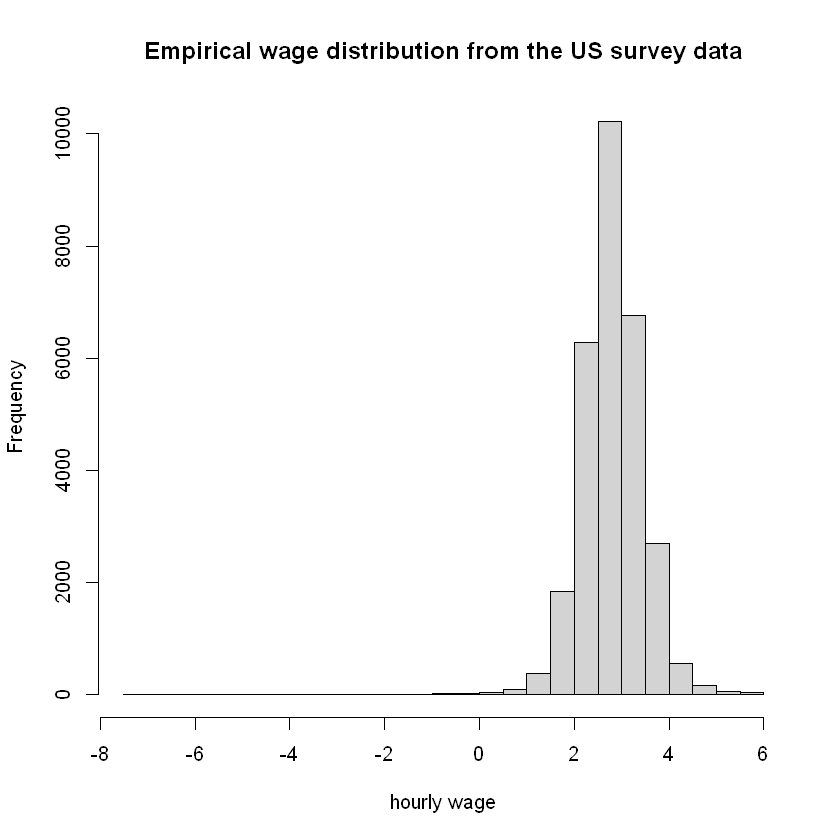

In [119]:
HV = hist(data$lnw, xlab= "hourly wage", main="Empirical wage distribution from the US survey data", breaks= 35)


In [120]:
#breaks from the hist
HV$breaks

[1] -7.5 -7.0 -6.5 -6.0 -5.5 -5.0 -4.5 -4.0 -3.5 -3.0 -2.5 -2.0 -1.5 -1.0 -0.5
[16]  0.0  0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  6.0

#### Analysis for the data
 Now it´s regression time

In [121]:
#split the data
set.seed(1234)
training <- sample(nrow(data), nrow(data)*(3/4), replace=FALSE)

data_train <- data[training,]
data_test <- data[-training,]

#two matrices

In [122]:
#matrix test
dim(data_test)


[1] 7305   23

In [123]:
#matrix train is bigger
dim(data_train)

[1] 21912    23

In [124]:
#specify the models
X_basic <-  "female + female : (widowed + divorced + separated + nevermarried +
hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + exp3)"
X_flex <- "female + female : (widowed + divorced + separated + nevermarried +
hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + exp3) + (widowed + divorced + separated + nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so +we + exp1 + exp2 + exp3) ^ 2"
formula_basic <- as.formula(paste("lnw", "~", X_basic))
formula_flex <- as.formula(paste("lnw", "~", X_flex))

model_X_basic_train <- model.matrix(formula_basic,data_train)
model_X_basic_test <- model.matrix(formula_basic,data_test)
p_basic <- dim(model_X_basic_train)[2]

model_X_flex_train <- model.matrix(formula_flex,data_train)
model_X_flex_test <- model.matrix(formula_flex,data_test)
p_flex <- dim(model_X_flex_train)[2]

In [125]:
Y_train <- data_train$lnw
Y_test <- data_test$lnw

In [127]:
#basic model: number of regressors
p_basic

#flex model: number of regressors
p_flex



[1] 17

[1] 137

In [ ]:
###### OLS###########

In [128]:
# ols (basic model)
fit.lm.basic <- lm(formula_basic, data_train)
fit.lm.basic


Call:
lm(formula = formula_basic, data = data_train)

Coefficients:
        (Intercept)               female       female:widowed  
            2.91033             -0.71193             -0.10023  
    female:divorced     female:separated  female:nevermarried  
           -0.01400             -0.08382             -0.02270  
       female:hsd08        female:hsd911           female:hsg  
           -0.74701             -0.51944             -0.17263  
          female:cg            female:ad            female:mw  
            0.36295              0.60386             -0.10492  
          female:so            female:we          female:exp1  
           -0.05738             -0.01726              0.04753  
        female:exp2          female:exp3  
           -0.20025              0.02943  


In [129]:
# Compute the Out-Of-Sample Performance
yhat.lm.basic <- predict(fit.lm.basic, newdata=data_test)
cat("The mean squared error (MSE) using the basic model is equal to" , mean((Y_test-yhat.lm.basic)^2)) # MSE OLS (basic model)

The mean squared error (MSE) using the basic model is equal to 0.3949444

In [130]:
#Out of sample MSE
MSE.lm.basic <- summary(lm((Y_test-yhat.lm.basic)^2~1))$coef[1:2]
MSE.lm.basic

[1] 0.39494443 0.02139802

In [131]:
# Estimate the R^2
R2.lm.basic <- 1-MSE.lm.basic[1]/var(Y_test)
cat("The R^2 using the basic model is equal to",R2.lm.basic) # MSE OLS (basic model)


The R^2 using the basic model is equal to 0.1102755

In [133]:
#Now using flexible model
# ols (flexible model)
fit.lm.flex <- lm(formula_flex, data_train) 

# Compute the Out-Of-Sample Performance
options(warn=-1)
yhat.lm.flex <- predict(fit.lm.flex, newdata=data_test)
MSE.lm.flex <- summary(lm((Y_test-yhat.lm.flex)^2~1))$coef[1:2]

R2.lm.flex <- 1-MSE.lm.flex[1]/var(Y_test)
cat("The R^2 using the flexible model is equal to",R2.lm.flex) # MSE OLS (flexible model)

The R^2 using the flexible model is equal to 0.2287174

In [ ]:
# Higher R^2 using Flex model

In [ ]:
############## LASSO ####################

In [135]:
install.packages("hdm")
library(hdm)

Installing package into 'C:/Users/Luis/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'hdm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Luis\AppData\Local\Temp\Rtmpq2CLY3\downloaded_packages


In [136]:
# lasso and versions
library(hdm) 
fit.rlasso  <- rlasso(formula_basic, data_train, post=FALSE)
fit.rlasso.post <- rlasso(formula_basic, data_train, post=TRUE)

yhat.rlasso   <- predict(fit.rlasso, newdata=data_test)
yhat.rlasso.post   <- predict(fit.rlasso.post, newdata=data_test)

MSE.lasso <- summary(lm((Y_test-yhat.rlasso)^2~1))$coef[1:2]
MSE.lasso.post <- summary(lm((Y_test-yhat.rlasso.post)^2~1))$coef[1:2]

R2.lasso <- 1-MSE.lasso[1]/var(Y_test)
R2.lasso.post <- 1-MSE.lasso.post[1]/var(Y_test)
cat("The R^2 using the basic model is equal to",R2.lasso,"for lasso and",R2.lasso.post,"for post-lasso") # R^2 lasso/post-lasso (basic model)

The R^2 using the basic model is equal to 0.1062557 for lasso and 0.1042477 for post-lasso

In [137]:
# Repeat for flex model
fit.rlasso.flex  <- rlasso(formula_flex, data_train, post=FALSE)
fit.rlasso.post.flex <- rlasso(formula_flex, data_train, post=TRUE)
yhat.rlasso.flex   <- predict(fit.rlasso.flex, newdata=data_test)
yhat.rlasso.post.flex   <- predict(fit.rlasso.post.flex, newdata=data_test)

MSE.lasso.flex <- summary(lm((Y_test-yhat.rlasso.flex)^2~1))$coef[1:2]
MSE.lasso.post.flex <- summary(lm((Y_test-yhat.rlasso.post.flex)^2~1))$coef[1:2]

R2.lasso.flex <- 1-MSE.lasso.flex[1]/var(Y_test)
R2.lasso.post.flex <- 1-MSE.lasso.post.flex[1]/var(Y_test)
cat("The R^2 using the flexible model is equal to",R2.lasso.flex,"for lasso and",R2.lasso.post.flex,"for post-lasso") # R^2 lasso/post-lasso (flexible model)
The R^2 using the flexible model is equal to 0.2653058 for lasso and 0.2614714 for post-lasso

ERROR: Error in parse(text = x, srcfile = src): <text>:13:5: unexpected symbol
12: cat("The R^2 using the flexible model is equal to",R2.lasso.flex,"for lasso and",R2.lasso.post.flex,"for post-lasso") # R^2 lasso/post-lasso (flexible model)
13: The R
        ^


In [ ]:
##### LASSO - CV ###

In [138]:
install.packages("glmnet")
library(glmnet)


Installing package into 'C:/Users/Luis/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'glmnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Luis\AppData\Local\Temp\Rtmpq2CLY3\downloaded_packages


Loading required package: Matrix

Loaded glmnet 4.1-4



In [139]:
# Using basic model
fit.lasso.cv   <- cv.glmnet(model_X_basic_train, Y_train, family="gaussian", alpha=1)
fit.ridge   <- cv.glmnet(model_X_basic_train, Y_train, family="gaussian", alpha=0)
fit.elnet   <- cv.glmnet(model_X_basic_train, Y_train, family="gaussian", alpha=.5)

yhat.lasso.cv    <- predict(fit.lasso.cv, newx = model_X_basic_test)
yhat.ridge   <- predict(fit.ridge, newx = model_X_basic_test)
yhat.elnet   <- predict(fit.elnet, newx = model_X_basic_test)

MSE.lasso.cv <- summary(lm((Y_test-yhat.lasso.cv)^2~1))$coef[1:2]
MSE.ridge <- summary(lm((Y_test-yhat.ridge)^2~1))$coef[1:2]
MSE.elnet <- summary(lm((Y_test-yhat.elnet)^2~1))$coef[1:2]

R2.lasso.cv <- 1-MSE.lasso.cv[1]/var(Y_test)
R2.ridge <- 1-MSE.ridge[1]/var(Y_test)
R2.elnet <- 1-MSE.elnet[1]/var(Y_test)

# R^2 using cross-validation (basic model) 
cat("R^2 using cross-validation for lasso, ridge and elastic net in the basic model:",R2.lasso.cv,R2.ridge,R2.elnet)


R^2 using cross-validation for lasso, ridge and elastic net in the basic model: 0.08193926 0.09136083 0.08870976

In [147]:
# Now, using flex model

fit.lasso.cv.flex   <- cv.glmnet(model_X_flex_train, Y_train, family="gaussian", alpha=1)
fit.ridge.flex   <- cv.glmnet(model_X_flex_train, Y_train, family="gaussian", alpha=0)
fit.elnet.flex   <- cv.glmnet(model_X_flex_train, Y_train, family="gaussian", alpha=.5)

yhat.lasso.cv.flex    <- predict(fit.lasso.cv.flex , newx = model_X_flex_test)
yhat.ridge.flex    <- predict(fit.ridge.flex , newx = model_X_flex_test)
yhat.elnet.flex    <- predict(fit.elnet.flex , newx = model_X_flex_test)

MSE.lasso.cv.flex  <- summary(lm((Y_test-yhat.lasso.cv.flex )^2~1))$coef[1:2]
MSE.ridge.flex  <- summary(lm((Y_test-yhat.ridge.flex )^2~1))$coef[1:2]
MSE.elnet.flex  <- summary(lm((Y_test-yhat.elnet.flex )^2~1))$coef[1:2]

R2.lasso.cv.flex  <- 1-MSE.lasso.cv.flex [1]/var(Y_test)
R2.ridge.flex  <- 1-MSE.ridge.flex [1]/var(Y_test)
R2.elnet.flex  <- 1-MSE.elnet.flex [1]/var(Y_test)

# R^2 using cross-validation (flexible model) 
cat("R^2 using cross-validation for lasso, ridge and elastic net in the flexible model:",R2.lasso.cv.flex,R2.ridge.flex,R2.elnet.flex)

R^2 using cross-validation for lasso, ridge and elastic net in the flexible model: 0.2237391 0.2150159 0.2187845

In [148]:
# comparing the MSE 
MSE.lasso.cv[1]
MSE.lasso.cv.flex[1]

#Flex works better

[1] 0.4075228

[1] 0.3445785

In [ ]:
########## Non-linear models #################

In [ ]:
install.packages("randomForest")
install.packages("rpart")
install.packages("nnet")
install.packages("gbm")
install.packages("rpart.plot")
install.packages("keras")

library(randomForest)
library(rpart)
library(nnet)
library(gbm)
library(rpart.plot)
library(keras)


Installing package into 'C:/Users/Luis/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'randomForest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Luis\AppData\Local\Temp\Rtmpq2CLY3\downloaded_packages


Installing package into 'C:/Users/Luis/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'rpart' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Luis\AppData\Local\Temp\Rtmpq2CLY3\downloaded_packages


Installing package into 'C:/Users/Luis/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'nnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Luis\AppData\Local\Temp\Rtmpq2CLY3\downloaded_packages


Installing package into 'C:/Users/Luis/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'gbm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Luis\AppData\Local\Temp\Rtmpq2CLY3\downloaded_packages


Installing package into 'C:/Users/Luis/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



In [ ]:
## regression trees ##

In [ ]:
formula_basic


In [ ]:
fit.trees <- rpart(formula_basic, data_train, cp = 0)
prp(fit.trees, leaf.round=1, space=2, yspace=2, split.space=2, shadow.col = "gray", trace = 1) # plotting the tree


# Tree regression

Usually, to make regressions we assume a linear relation between variables. In the case where clusters might be found in the data, a linear regression is not the best way to estimate a prediction model. The best way is to use a Tree regression since it captures non-linear relations between the Y and the X regressors. For instance, a regression tree allows us to make a prediction using continuous or categorical variables. However, a regression tree always tries to predict a continuous value. 

The main concept of regression tree (also classifier tree) is to split the data in a binary criterion until it reaches pure leaf. Finally, each leaf represents a relevant cluster in our dataset. This allows to predict a in which group a new observation in the data corresponds by following the conditions node by node. 
The first step consists in determine under which value we split the first node. Therefore, we need to find the best splitting condition. For this step the computer tests each possible value to split the data and propose a set of candidates. In a scenario with multiple covariates, the algorithm evaluates each covariate one at time, and for each covariate estimates the proper split value by choosing the one with lowest sum squared errors. The variable that goes in the first node is the one with the lowest sum squared errors. This process repeats for each node.


This step repeats for each possible split. However, the number of final leaves will depend on if it is needed to do an extra split in each leaf. This process can result in an overfitting of the data and the model can´t be generalize. To solve this, we have to prune the tree by setting penalization parameters on the impurities of the leaf.
First, we have to determine the optimal complexity of the tree. To do this we set the algorithm to prune or “cut” the leaf with a relatively small alpha. The smallest alphas are pruned first. We set an algorithm that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. Larger alphas mean more of the tree is pruned, which increases the total impurity of its leaves.


Next, we make a cross validation process for al the alphas proposed and calculate the accuracy mean for each alpha. The optimal alpha for our tree would be the one with the lowest mean accuracy rate. 
Finally. We set that value of alpha in the DecisionTreeRegressor function in Python to get our optimal depth and number of leaves.